## 2- Regression -  Car Price Prediction

In [2]:
We will be predicting the car price based on given features.

SyntaxError: invalid syntax (1230896814.py, line 1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [4]:
df=pd.read_csv("CarPrice.txt", delimiter=',')

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.corr(numeric_only=True).abs().style.background_gradient(cmap='coolwarm')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255,0.109093
symboling,0.151621,1.000000,0.531954,0.357612,0.232919,0.541038,0.227691,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606,0.079978
wheelbase,0.129729,0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082,0.577816
carlength,0.170636,0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662,0.682920
carwidth,0.052387,0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218,0.759325
carheight,0.255960,0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
curbweight,0.071962,0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465,0.835305
enginesize,0.033930,0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470,0.874145
boreratio,0.260064,0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012,0.553173
stroke,0.160824,0.008735,0.160959,0.129533,0.182942,0.055307,0.168790,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931,0.079443


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

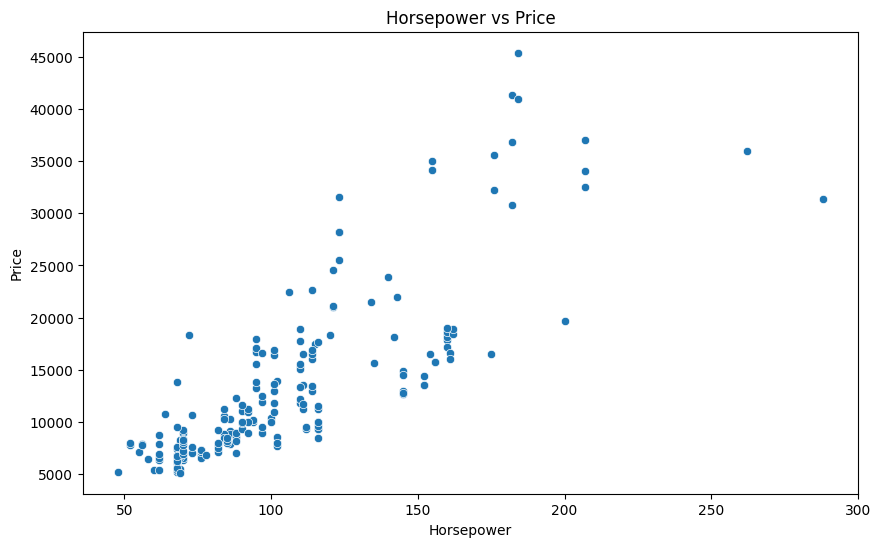

In [11]:
# Scatter plot for 'horsepower' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


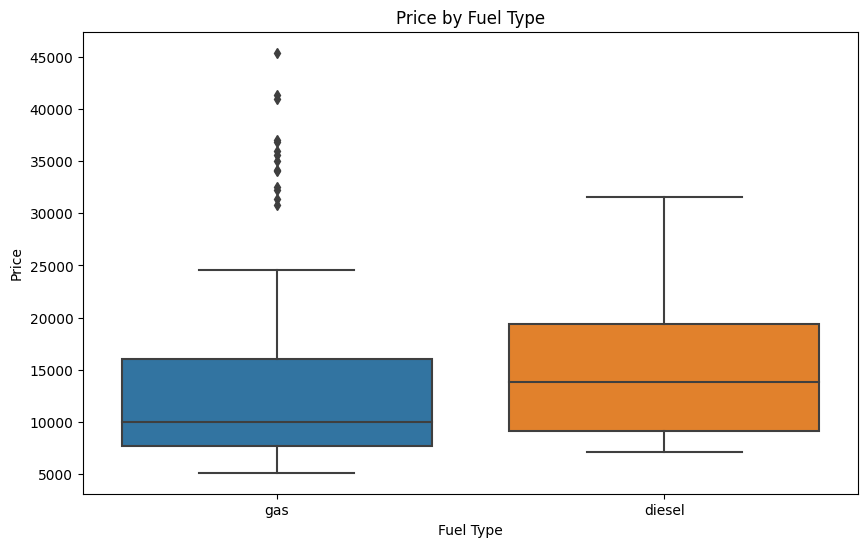

In [12]:
# Box plot of 'price' by 'fueltype'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

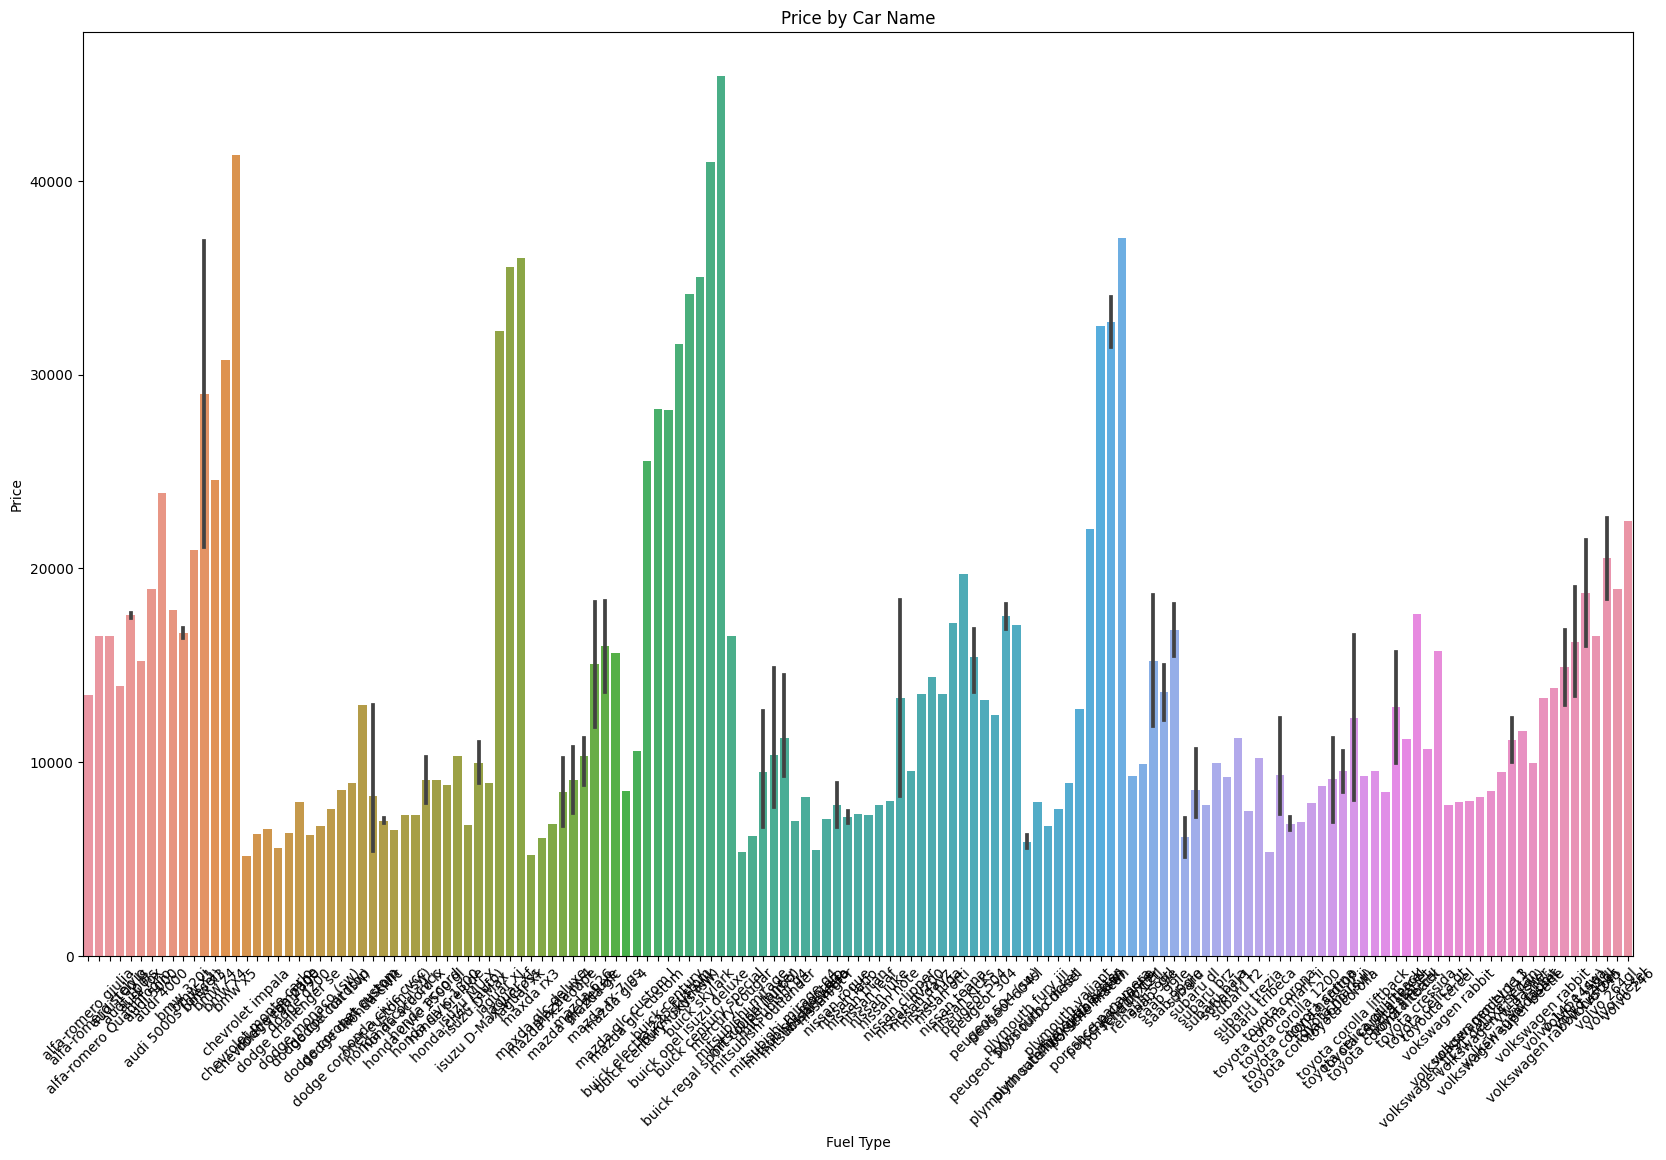

In [13]:
# Box plot of 'price' by 'fueltype'
plt.figure(figsize=(20, 12))
sns.barplot(x='CarName', y='price', data=df)
plt.title('Price by Car Name')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

In [14]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [15]:
car_model_split = df['CarName'].str.split(' ', n=1, expand=True)


In [16]:
df['Car'] = car_model_split[0]

In [17]:
df['Model'] = car_model_split[1]

In [18]:
df.drop(columns=['CarName'], inplace=True)

In [19]:
df['Car'].value_counts()

Car
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [20]:
df['Car'] = df['Car'].str.lower()

In [21]:
df['Car'].replace({'toyouta': 'toyota', 'maxda': 'mazda', 'vw': 'volkswagen', 'vokswagen': 'volkswagen', 
                   'Nissan': 'nissan', 'porcshce': 'porsche'}, inplace=True)

In [22]:
df['Car'] = df['Car'].replace({'toyouta': 'toyota', 'maxda': 'mazda', 'vw': 'volkswagen', 'vokswagen': 'volkswagen', 
                                'Nissan': 'nissan', 'porcshce': 'porsche'})

In [23]:
df['Car'].value_counts()

Car
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [24]:
x = df.drop(columns=['price'], axis=1)
y = df['price']

In [25]:
x= pd.get_dummies(x, drop_first=True)

In [26]:
algo_test(x, y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.932624,2306.276123,1665.344996
XGBRegressor,0.927735,2388.487307,1619.086783
Ridge,0.898136,2835.767600,1960.407401
Extra Tree,0.890012,2946.674744,2125.422756
Lasso,0.888398,2968.218561,2058.657729
ElasticNet,0.865392,3259.835248,2300.366834
Decision Tree,0.854231,3392.286392,2148.943098
KNeighborsRegressor,0.788949,4081.811041,2228.454463
Linear,0.713653,4754.513968,3079.688802


In [27]:
gbr=GradientBoostingRegressor()

In [28]:
model=gbr.fit(x,y)

In [29]:
prediction=model.predict(x)

In [30]:
r2_score(y,prediction)

0.9925103909583696

In [31]:
import pickle

pickle.dump(model, open('car_price_model.h5', 'wb'))